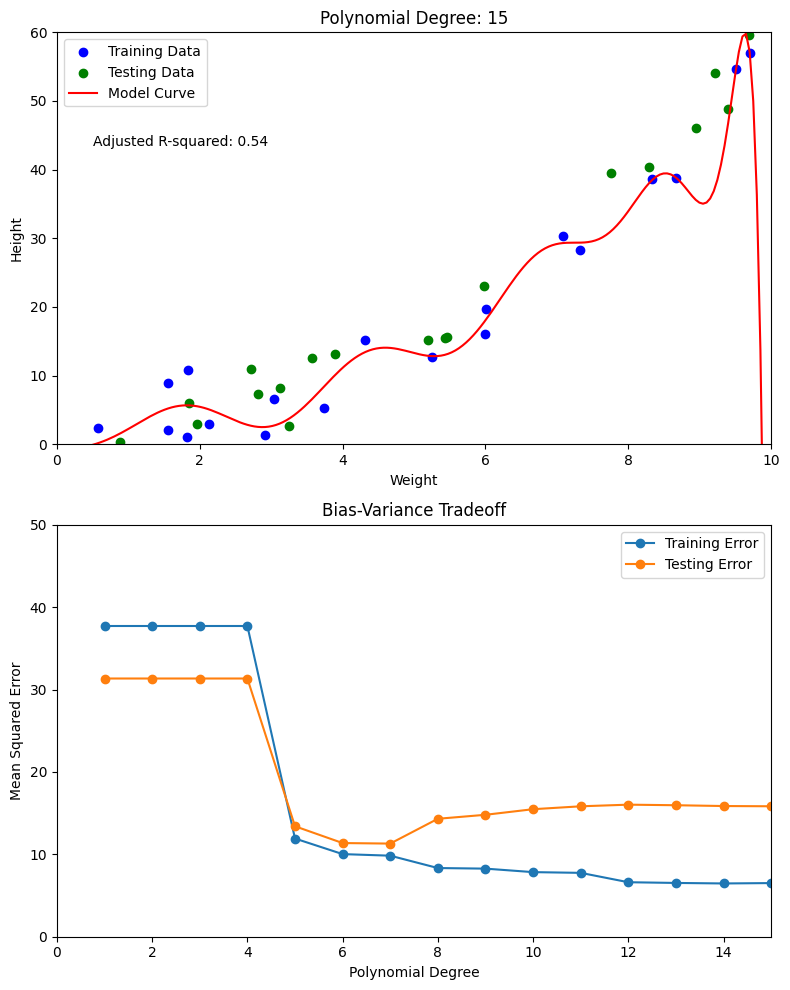

In [9]:
#Import necessary library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.animation as animation
from sklearn.metrics import r2_score

# Generate synthetic data (no changes here)
np.random.seed(42)
x_train = np.random.uniform(0, 10, 20)
y_train = 2 + 0.6 * x_train**2 - 0.3 * x_train + np.random.normal(0, 4, len(x_train))

x_test = np.random.uniform(0, 10, 20)
y_test = 2 + 0.6 * x_test**2 - 0.3 * x_test + np.random.normal(0, 4, len(x_test))

x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

# Initialize figures and axes for two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))  # Adjust figsize as needed

x_range = np.linspace(0, 10, 200).reshape(-1, 1)

# Plot for Polynomial Degree
train_scatter1 = ax1.scatter(x_train, y_train, color="blue", label="Training Data")
test_scatter1 = ax1.scatter(x_test, y_test, color="green", label="Testing Data")
curve1, = ax1.plot([], [], color="red", label="Model Curve")
ax1.legend()
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 60)
ax1.set_xlabel("Weight")
ax1.set_ylabel("Height")

# Plot for Bias-Variance Tradeoff
train_errors = []
test_errors = []
line_train, = ax2.plot([], [], label="Training Error", marker="o")
line_test, = ax2.plot([], [], label="Testing Error", marker="o")
ax2.set_xlabel("Polynomial Degree")
ax2.set_ylabel("Mean Squared Error")
ax2.set_title("Bias-Variance Tradeoff")
ax2.legend()
ax2.set_xlim(0, 15) # Set x-axis limit to accommodate 15 degrees
ax2.set_ylim(0, 50) # Set y-axis limit to accommodate errors

def update(degree):
    global train_errors, test_errors
    ax1.set_title(f"Polynomial Degree: {degree}")

    # Polynomial regression (no changes here)
    poly = PolynomialFeatures(degree=degree)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)
    x_poly_range = poly.transform(x_range)

    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    y_pred_train = model.predict(x_poly_train)
    y_pred_test = model.predict(x_poly_test)
    y_pred_range = model.predict(x_poly_range)

    train_error = mean_squared_error(y_train, y_pred_train)
    test_error = mean_squared_error(y_test, y_pred_test)

    for text in ax1.texts:  # Remove all text objects from the axes
        text.remove()

    # Calculate adjusted R-squared
    n = len(y_test)  # Number of samples
    p = degree     # Number of predictors (polynomial degree)
    r2 = r2_score(y_test, y_pred_test)
    # Check if denominator will be zero and handle it
    if n - p - 1 <= 0:
        adjusted_r2 = np.nan  # or any other appropriate value to indicate an error
    else:
        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    train_errors.append(train_error)
    test_errors.append(test_error)

    curve1.set_data(x_range, y_pred_range)

    # Update bias-variance plot
    line_train.set_data(range(1, len(train_errors) + 1), train_errors)
    line_test.set_data(range(1, len(test_errors) + 1), test_errors)

    # Display adjusted R-squared on the plot
    ax1.text(0.05, 0.75, f"Adjusted R-squared: {adjusted_r2:.2f}", transform=ax1.transAxes, fontsize=10, verticalalignment='top')

    # Update bias-variance plot
    line_train.set_data(range(1, len(train_errors) + 1), train_errors)
    line_test.set_data(range(1, len(test_errors) + 1), test_errors)
    # Update bias-variance plot (modified to ensure x-axis matches the polynomial degree)
    line_train.set_data(range(1, degree + 1), train_errors[:degree])  # Use degree to limit train errors
    line_test.set_data(range(1, degree + 1), test_errors[:degree])  # Use degree to limit test errors

    # ax2.set_xlim(1, degree)  # Adjust x-axis limit dynamically
    #ax2.relim()            # Recalculate the data limits
    ax2.autoscale_view()    # Autoscale the view
    return curve1, line_train, line_test

# Create animation
ani = animation.FuncAnimation(fig, update, frames=range(1, 16), interval=1000, blit=True)
ani.save("bias_variance_animation3.gif", writer="pillow")
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()